# Lab 4 Solution

**Learning Objectives:**

- Identify types of objects
- Use Python help to learn to use unfamiliar functions
- Use Python debugger

## Objects and Types

### Exercise 1

Use the `type` command to find the type of each of the following after importing `numpy` as `np`.
```python
np
np.sum
np.array
np.array([3,4,5])
np.array([3,4,5]).sum
np.array([3,4,5]).sum()
type(np.array([3,4,5]).sum())
```

In [2]:
import numpy as np
print(type(np))
print(type(np.sum))
print(type(np.array))
print(type(np.array([3,4,5])))
print(type(np.array([3,4,5]).sum))
print(type(np.array([3,4,5]).sum()))
print(type(type(np.array([3,4,5]).sum())))

<class 'module'>
<class 'function'>
<class 'builtin_function_or_method'>
<class 'numpy.ndarray'>
<class 'builtin_function_or_method'>
<class 'numpy.int32'>
<class 'type'>


**Solution:**

| Object | Type |
| ----- |-----|
|`np`  | module |
|`np.sum` | function |
|`np.array` | function |
|`np.array([3,4,5])` | numpy array|
|`np.array([3,4,5]).sum` |function |
|`np.array([3,4,5]).sum()` | numpy int |
|`type(np.array([3,4,5]).sum())` |type |

### Exercise 2

Consider the code
```python
def f(x):
    return 3*x
d={3:[f,[4,f],'hi'],4:{3,2}}
```

By inspection only, without using the `type` command, identify the type of each of the following
```python
d
d[3]
d[3][0]
d[3][0](3)
d[3][-1]
d[4]
```
Check your answer using the `type` command.

**Solution:**

| Object | Type |
| ---| ---|
|`d` | dict |
| `d[3]` | list |
| `d[3][0]` | function |
|`d[3][0](3)` | int |
|`d[3][-1]` | str |
|`d[4]` | set|

## Reading Python Help to Understand Unfamiliar Code

### Exercise 3
Without running the code.

- Identify all the objects in the following segment of code 
- Use Python help to deduce the type of each object 
- Use Python help to predict the output

```python
import pandas as pd
import matplotlib.pyplot as plt

data=[['JKP 102',20153,'M',0.8],['JKP 102',20153,'T',0.7],['JKP 104',20153,'M',0.6]]
df=pd.DataFrame(data,columns=['Room','Term','Day','Utilization'])

(df.query("Term==20153 & Day=='M'")
         .sort_values(['Room'])
         .plot(x='Room',y='Utilization',by='Day',kind='bar',title='Plot',figsize=(8,4),ylim=(0,1),legend=False)
)
plt.show()
```

After you are done, run the code to verify your answers.

**Solution:**

| Object | Type |
|------|-------|
| `pd` | module |
| `plt` | module |
| `data` | list |
| `df` | pandas DataFrame |
| `df.query` | function |
| `df.query(...)` | pandas DataFrame |
| `def.query(...).sort_values` | function |
| `def.query(...).sort_values(...)` |pandas DataFrame|
| `def.query(...).sort_values(...).plot` | function |
| `plt.show`       | function |

Commands to look up 
```python

pd.DataFrame?
pd.DataFrame.query?
pd.DataFrame.sort_values?
pd.plot?
```

After reading the help files for these functions, we explain the code below using comments and run it.

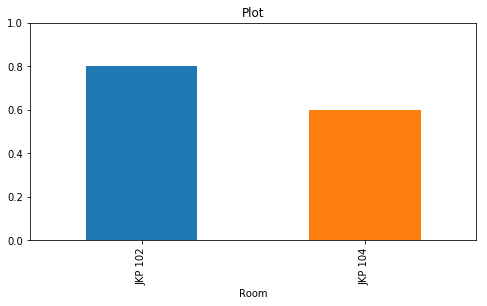

In [6]:
# Importing modules pd and plt
import pandas as pd
import matplotlib.pyplot as plt

# Constructing list of lists and assigning it to variable "data."
data=[['JKP 102',20153,'M',0.8],['JKP 102',20153,'T',0.7],['JKP 104',20153,'M',0.6]]

# Constructing DataFrame object using the data and given columns and assigning it to variable "df"
df=pd.DataFrame(data,columns=['Room','Term','Day','Utilization'])

# Multi-line chained command
(df.query("Term==20153 & Day=='M'")  # Filter DataFrame df for given Term and Day.
         .sort_values(['Room'])   # Sort rows of DataFrame df by column Room.
         .plot(x='Room',y='Utilization',by='Day',kind='bar',title='Plot',figsize=(8,4),ylim=(0,1),legend=False) 
 # Plot bar plot with given x-axis, y-axis, by-filter (extraneous), kind of plot, title, figure size, y-axis limits, no legend
)
plt.show()

## Using the Python Debugger

See detailed description of pdb commands here: https://docs.python.org/3/library/pdb.html

The basic commands are:

- `l` for listing code around current line
- `p x` for print expression x
- `s` for step one line (execute one line)
- `c` for continuing execution until next break point
- `q` for quiting


In [9]:
# Code demonstration
import pdb
def f(x):
    pdb.set_trace()   # set break point
    return x+3
f('3')

# Alternative 
% pdb on           # Automatically enter debugging upon error

> <ipython-input-9-6c4d5c4c0557>(5)f()
-> return x+3
(Pdb) p x
'3'
(Pdb) s
TypeError: must be str, not int
> <ipython-input-9-6c4d5c4c0557>(5)f()
-> return x+3
(Pdb) c


TypeError: must be str, not int

### Exercise 3
Use `pdb.set_trace()` to identify the bug in the following code from Lab 3.

In [26]:
import pdb
def convert(inputTime):
    try:
        pdb.set_trace()
        hh,mm,ss=str(InputTime).split(':')
        ans=int(hh)+int(mm)/60+int(ss)/3600
    except:
        ans=np.nan
    return ans
convert('18:00:00')

> <ipython-input-26-a59d57effd03>(5)convert()
-> hh,mm,ss=str(InputTime).split(':')
(Pdb) l
  1  	import pdb
  2  	def convert(inputTime):
  3  	    try:
  4  	        pdb.set_trace()
  5  ->	        hh,mm,ss=str(InputTime).split(':')
  6  	        ans=int(hh)+int(mm)/60+int(ss)/3600
  7  	    except:
  8  	        ans=np.nan
  9  	    return ans
 10  	convert('18:00:00')
[EOF]
(Pdb) p inputTime
'18:00:00'
(Pdb) s
NameError: name 'InputTime' is not defined
> <ipython-input-26-a59d57effd03>(5)convert()
-> hh,mm,ss=str(InputTime).split(':')
(Pdb) hh,mm,ss=str(inputTime).split(':')
(Pdb) hh
'18'
(Pdb) p mm
'00'
(Pdb) ss
'00'
(Pdb) c


nan

**Bug:**
The variable `InputTime` inside the function does not exist, it should be changed to `inputTime`, which does exist.

### Exercise 4
Use `%pdb on` to turn on automatic debugging upon error and figure out what's wrong in the following code from Lab 3.

**Note:** The following code will only work once the above `convert` function is fixed and loaded, and if the data files for the final project are in the same directory as the current Jupyter notebook.

In [ ]:
%pdb on
#Importing packages
import pandas as pd
import numpy as np

#Reading excel files
schedule=pd.read_excel('Marshall_Course_Enrollment_1516_1617.xlsx')
cancelled=pd.read_excel('Cancelled_Courses_1516_1617.xlsx')
master=schedule.append(cancelled)
capacities=pd.read_excel('Marshall_Room_Capacity_Chart.xlsx')

roomSet=set(capacities.Room)      # Create a set which contains the rooms in the capacities file.
ans={}                   # Initialize a dictionary to store the result we want

df=master 
master.head()           # Print the first few lines of the DataFrame master, which we loaded above. See index on the left, and each row

# Iterate through the rows of the data frame above. The variable "row" will go through the rows of the dataframe. "index" will go through the indices (see left above)
for index,row in df.iterrows():   
    term=row['Term']       # Obtain the corresponding column of each row
    room=row['First Room']
    days=row['First Days'] 
    beg=convert(row['First Begin Time'])   # Convert the begin time strings into decimal numbers using challenge 1
    end=convert(row['First End Time'])     # Convert the begin time strings into decimal numbers using challenge 1
    # Skip rows in which beg and end are np.nan (not a number), and in which the room is not in the capacity file
    for day in 'MTWHF':   # Iterate through the sequence ['M','T','W','H','F']
        if day in days: 
            key=(term,room,day)  # The key of the dictionary to set
            if key not in ans:   # if this key is not in the dictionary, add it, with the beg and end time of the current row
                ans[key]=(beg,end)   
            else:
                oldBeg,oldEnd=ans[key]  # If the key is in the dictionary, update it to find the earliest beg time so far and latest end time
                newBeg=min(beg,oldBeg)
                newEnd=max(end,oldEnd)
                ans[key]=(newBeg,newEnd)
ans

Automatic pdb calling has been turned ON


TypeError: argument of type 'float' is not iterable

> <ipython-input-29-05fb11f593ef>(27)<module>()
     25     # Skip rows in which beg and end are np.nan (not a number), and in which the room is not in the capacity file
     26     for day in 'MTWHF':   # Iterate through the sequence ['M','T','W','H','F']
---> 27         if day in days:
     28             key=(term,room,day)  # The key of the dictionary to set
     29             if key not in ans:   # if this key is not in the dictionary, add it, with the beg and end time of the current row

ipdb> l
     22     days=row['First Days']
     23     beg=convert(row['First Begin Time'])   # Convert the begin time strings into decimal numbers using challenge 1
     24     end=convert(row['First End Time'])     # Convert the begin time strings into decimal numbers using challenge 1
     25     # Skip rows in which beg and end are np.nan (not a number), and in which the room is not in the capacity file
     26     for day in 'MTWHF':   # Iterate through the sequence ['M','T','W','H','F']
--

**Bug:**
The variable `days` is set to `np.nan` in one iteration, rather than a string. We cannot do `'M' in np.nan`, but can only do `'M' in 'MW'`. The fix would be to filter out all rows of the DataFrame for which `days` is `np.nan`, using the `np.isnan` command. See a similar fix applied to the Lab 3 Solutions.